# Logistic Regression

## Part 1 - Data Preprocessing

### Loading the Dataset

In [2]:
import pandas as pd
dataset = pd.read_csv('breast cancer data.csv')
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,2,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,2,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,2,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,2,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,2,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Extracting inputs (X) and output (y)

In [3]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,

### Creating the Training Set and the Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
X_train

array([[1.005e+01, 1.753e+01, 6.441e+01, ..., 6.499e-02, 2.894e-01,
        7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, ..., 7.485e-02, 2.965e-01,
        7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
        7.012e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [8]:
X_test

array([[1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.321e+01, 2.525e+01, 8.410e+01, ..., 6.005e-02, 2.444e-01,
        6.788e-02],
       [1.402e+01, 1.566e+01, 8.959e+01, ..., 8.216e-02, 2.136e-01,
        6.710e-02],
       ...,
       [2.018e+01, 1.954e+01, 1.338e+02, ..., 2.173e-01, 3.032e-01,
        8.075e-02],
       [1.831e+01, 2.058e+01, 1.208e+02, ..., 1.510e-01, 3.074e-01,
        7.863e-02],
       [1.504e+01, 1.674e+01, 9.873e+01, ..., 1.018e-01, 2.177e-01,
        8.549e-02]])

In [9]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2,

In [10]:
y_test

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1])

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [12]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

## Part 2 - Building and training the model

### Creating the Logistic Regression model

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [14]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [15]:
y_pred = model.predict(sc.transform(X_test))

In [16]:
y_pred

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1])

#### Predicting a single data point

1. radius_mean 
2. texture_mean 
3. perimeter_mean 
4. area_mean 
5. smoothness_mean 
6. compactness_mean
7. concavity_mean
8. concave points_mean
9. symmetry_mean
10. fractal_dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal_dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal_dimension_worst




In [17]:
model.predict(sc.transform([[17.99,10.38,122.8,1001,0.1184,	0.2776,	0.3001,	0.1471,	0.2419,	0.07871,	1.095,	0.9053,	8.589,	153.4,	0.006399,	0.04904,	0.05373,	0.01587,	0.03003,	0.006193,	25.38,	17.33,	184.6,	2019,	0.1622,	0.6656,	0.7119,	0.2654,	0.4601,	0.1189,]]))

array([2])

## Part 3: Evaluating the model 

### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[65,  2],
       [ 2, 45]])

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Generate the confusion matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)

### Plotting the confusion matrix

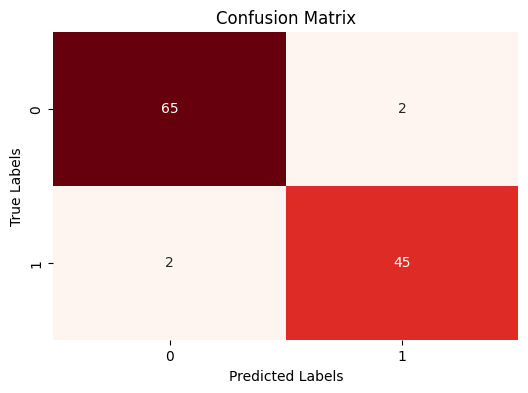

In [26]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Accuracy

In [27]:
(65+45)/(65+45+2+2)

0.9649122807017544

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9649122807017544